# HW1: дедлайн 09.02.2025 23:59

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from scipy.stats import ks_2samp, kstest


**Задание 1 (3 балла)**

1. Реализуйте алгоритм генерации случайного графа $G(n,p)$ для разных параметров $n,p$ (внизу небольшая помощь).
2. Посчитайте коэффициент кластеризации, диаметр, радиус и среднюю длину кратчайшего пути
3. Нарисуйте распределение степеней вершин в графе. На какое оно похоже?

In [8]:
def random_edges(nodes, p):
    edges = []
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            if np.random.rand() < p:
                edges.append((nodes[i], nodes[j]))
    return np.array(edges)

def random_graph(n, p):
    G = nx.Graph()
    nodes = np.arange(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_edges(nodes, p))
    return G

In [3]:
'''Проверим себя'''
assert len(random_graph(100, 0.1).edges) > 0
n = 100
p = 0.4
n_edges = n * (n-1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert  p - 3*sigma < random_edges(np.arange(n), p).shape[0] / n_edges < p + 3*sigma
n = 1000
p = 0.01
n_edges = n * (n-1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert  p - 3*sigma < random_edges(np.arange(n), p).shape[0] / n_edges < p + 3*sigma
n = 300
p = 0.9
n_edges = n * (n-1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert  p - 3*sigma < random_edges(np.arange(n), p).shape[0] / n_edges < p + 3*sigma

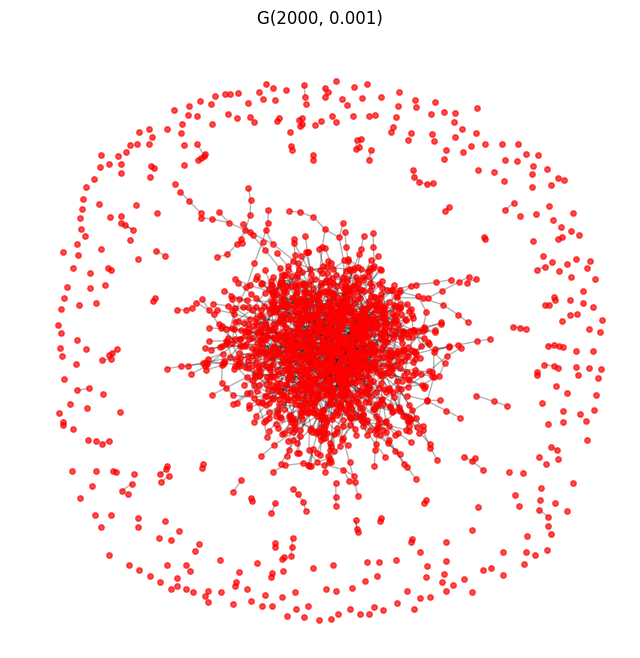

In [21]:
G = random_graph(2000, 2/2000)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42, iterations=30)
nx.draw_networkx_nodes(G, pos, node_size=15, node_color='red', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.axis('off')
plt.title(f"G({2000}, {2/2000})")
plt.show()

In [22]:
def clustering_coefficient(G):
    return nx.average_clustering(G)

def graph_diameter(G):
    return nx.diameter(G)

def graph_radius(G):
    return nx.radius(G)

def average_shortest_path_length(G):
    return nx.average_shortest_path_length(G)

print(f"Средний коэффициент кластеризации: {clustering_coefficient(G)}")

if not nx.is_connected(G):
    Gcc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
    print(f"Граф несвязный. Размер наибольшей компоненты: {len(max(nx.connected_components(G), key=len))}")
else:
    Gcc = G

#дальше везде мы считаем для наибольшей связной компоненты

print(f"Диаметр: {graph_diameter(Gcc)}")

print(f"Радиус: {graph_radius(Gcc)}")

print(f"Средняя длина кратчайшего пути: {average_shortest_path_length(Gcc)}")

Средний коэффициент кластеризации: 0.0015904761904761903
Граф несвязный. Размер наибольшей компоненты: 1541
Диаметр: 25
Радиус: 14
Средняя длина кратчайшего пути: 9.672623612597656


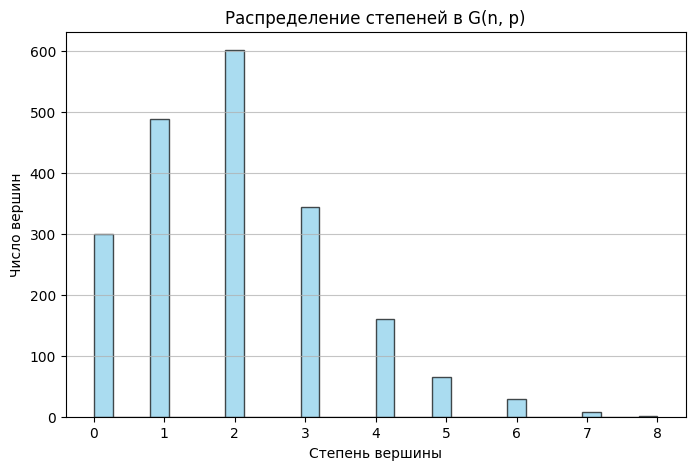

In [23]:
degree_sequence = [d for _, d in G.degree()]

plt.figure(figsize=(8, 5))
plt.hist(degree_sequence, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Распределение степеней в G(n, p)")
plt.xlabel("Степень вершины")
plt.ylabel("Число вершин")
plt.grid(axis='y', alpha=0.75)
plt.show()

Это очень похоже на распределение Пуассона с $\lambda = 2$

**Задание 2 (7 баллов)**

1. Реализуйте алгоритм генерации модели Барабаси-Альберта $G(n,m)$ (внизу небольшая помощь).
2. Посчитайте коэффициент кластеризации, диаметр, радиус и среднюю длину кратчайшего пути
3. Нарисуйте распределение степеней вершин в графе. На какое оно похоже?

In [15]:
def connect_new_node(node, G, m):
    repeated_nodes = []
    for existing_node in G.nodes():
        repeated_nodes.extend([existing_node] * G.degree(existing_node))
    targets = set()
    while len(targets) < m:
        targets.add(np.random.choice(repeated_nodes))
    for target_node in targets:
        G.add_edge(node, target_node)

def barabasi_albert_graph(n, m):
    G = nx.star_graph(m)
    for i in trange(1, n - m):
        connect_new_node(m + i, G, m)
    return G

In [16]:
# проверим себя
G = nx.star_graph(3)
connect_new_node(4, G, 4)
assert nx.number_of_edges(G) == 7

cases = [[10, 2],
         [1000, 5],
         [1000, 13]]
for n, m in cases:
    G = barabasi_albert_graph(n, m)
    degree_seq = [degree for (node, degree) in G.degree]
    nxG = nx.barabasi_albert_graph(n, m)
    nxdegree_seq = [degree for (node, degree) in nxG.degree]
    assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/994 [00:00<?, ?it/s]

  0%|          | 0/986 [00:00<?, ?it/s]

  0%|          | 0/994 [00:00<?, ?it/s]

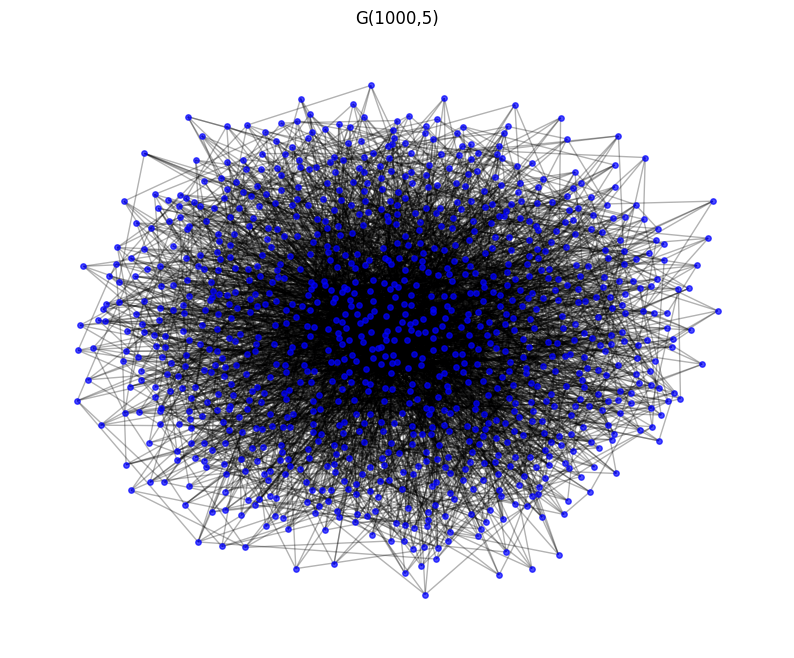

In [25]:
G = barabasi_albert_graph(1000, 5)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.15, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=15, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.axis('off')
plt.title(f'G({1000},{5})')
plt.show()

In [26]:
def clustering_coefficient(G):
    return nx.average_clustering(G)

def graph_diameter(G):
    return nx.diameter(G)

def graph_radius(G):
    return nx.radius(G)

def average_shortest_path_length(G):
    return nx.average_shortest_path_length(G)

print(f"Средний коэффициент кластеризации: {clustering_coefficient(G)}")

if not nx.is_connected(G):
    Gcc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
    print(f"Граф несвязный. Размер наибольшей компоненты: {len(max(nx.connected_components(G), key=len))}")
else:
    Gcc = G

#дальше везде мы считаем для наибольшей связной компоненты

print(f"Диаметр: {graph_diameter(Gcc)}")

print(f"Радиус: {graph_radius(Gcc)}")

print(f"Средняя длина кратчайшего пути: {average_shortest_path_length(Gcc)}")

Средний коэффициент кластеризации: 0.03329496857161259
Диаметр: 5
Радиус: 3
Средняя длина кратчайшего пути: 3.012914914914915


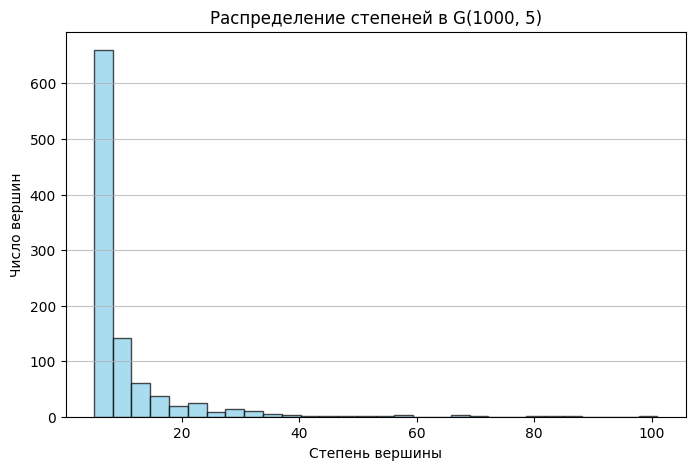

In [28]:
degree_sequence = [d for _, d in G.degree()]

plt.figure(figsize=(8, 5))
plt.hist(degree_sequence, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Распределение степеней в G(1000, 5)")
plt.xlabel("Степень вершины")
plt.ylabel("Число вершин")
plt.grid(axis='y', alpha=0.75)
plt.show()

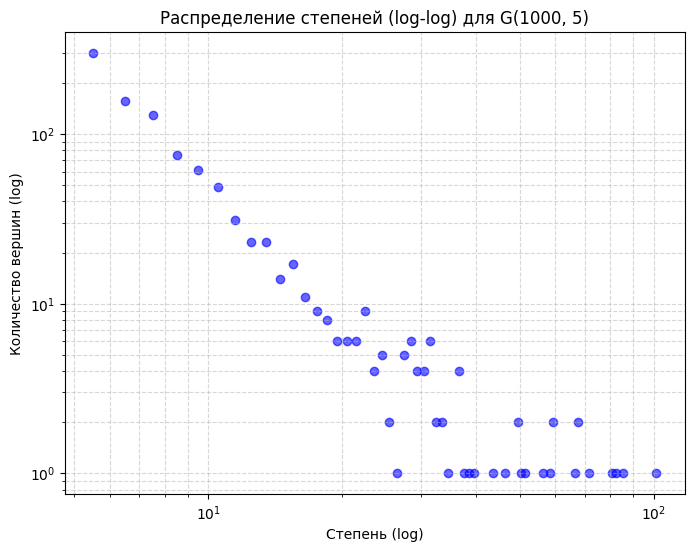

In [30]:
plt.figure(figsize=(8, 6))
counts, bins = np.histogram(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence)+2))
centers = 0.5 * (bins[:-1] + bins[1:])
plt.scatter(centers, counts, alpha=0.6, color='b')
plt.xscale('log')
plt.yscale('log')
plt.title("Распределение степеней (log-log) для G(1000, 5)")
plt.xlabel("Степень (log)")
plt.ylabel("Количество вершин (log)")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

In [33]:
pip install powerlaw

Calculating best minimal value for power law fit


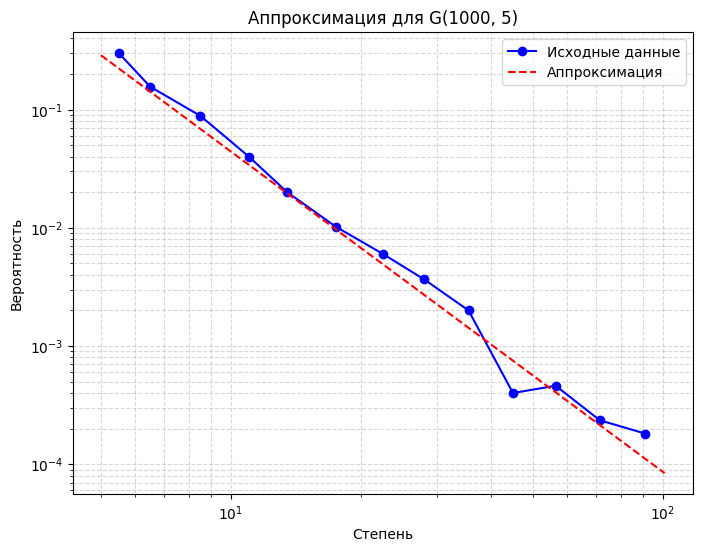

In [38]:
import powerlaw

fit = powerlaw.Fit(degree_sequence, discrete=True)
plt.figure(figsize=(8, 6))
data = degree_sequence
results = powerlaw.plot_pdf(data, color='b', marker='o', label='Исходные данные')
fit.power_law.plot_pdf(color='r', linestyle='--', label='Аппроксимация')

plt.legend()
plt.xlabel('Степень')
plt.ylabel('Вероятность')
plt.title(f'Аппроксимация для G(1000, 5)')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.show()

Очевидно, что распределение будет степенное.